# Tutorial: Discrete Dynamic Programming

## Computational Economics

## Markov Chains

A worker’s employment dynamics obey the stochastic matrix

$$P = \begin{bmatrix}
1-\alpha & \alpha \\
\beta & 1-\beta
\end{bmatrix}$$




with $\alpha\in(0,1)$ and $\beta\in (0,1)$. First line corresponds to employment, second line to unemployment.

__Which is the stationary equilibrium?__

In [1]:
using LinearAlgebra: I, \

In [2]:
α = 0.05
β = 0.1

0.1

In [3]:
P = [1-α α ; β 1-β]

2×2 Matrix{Float64}:
 0.95  0.05
 0.1   0.9

We want to find $\mu$ such that $\mu' P = \mu'$ or equivalently $\mu = P' \mu$ and $|\mu|=1$

It should satisfy $\underbrace{(P' - I)}_{M}\mu = 0$ and $|\mu|=1$.

In [4]:
M = P' - I

2×2 Matrix{Float64}:
 -0.05   0.1
  0.05  -0.1

We can see two lines of $M$ are colinear. We replace the latest one with ones to get $\tilde{M}$ and solve $\tilde{M} \mu = \begin{matrix} 0 \\1\end{matrix}$

In [16]:
Mt = copy(M)
Mt[end, :] .= 1
Mt

2×2 Matrix{Float64}:
 -0.05  0.1
  1.0   1.0

In [10]:
rhs = [0, 1]

2-element Vector{Int64}:
 0
 1

In [17]:
μ = Mt\ rhs

2-element Vector{Float64}:
 0.6666666666666665
 0.33333333333333354

Check the solution:

In [12]:
sum(μ) # should be 1

1.0

In [14]:
μ' * P - μ'  # should be 0 0

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 0.0  0.0

__In the long run, what will the the fraction $p$ of time spent unemployed? (Denote by $X_m$ the fraction of dates were one is unemployed)__

In [18]:
# the mathematical result is $\mu$ because it is the ergodic distribution. Let's check it numerically.

__Illustrate this convergence by generating a simulated series of length 10000 starting at $X_0=1$. Plot $X_m-p$ against $m$. (Take $\alpha=\beta=0.1$).__

In [19]:
s0 = 1

2-element Vector{Float64}:
 1.0
 0.0

In [32]:
function simulate(P, i0; T=10000)
    # i0 : index of initial state
    sim = []
    for t=1:T
        push!(sim, i0)
        p = P[i0,:]
        # you want to draw 1 with probability p[1] and 2 with probability p[2]=1-p[1]
        u = rand()
        if u<=p[1]
            i0 = 1
        else
            i0 = 2
        end
    end
    return sim
end

simulate (generic function with 1 method)

In [55]:
sim = simulate(P, 1);


In [34]:
using Plots

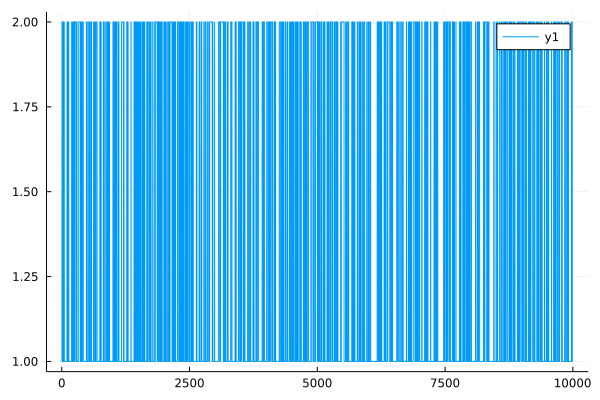

In [35]:
plot(sim)

In [40]:
methods(count_ones)

# 2 methods for generic function "count_ones":
[1] count_ones(x::Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}) in Base at int.jl:404
[2] count_ones(x::BigInt) in Base.GMP at gmp.jl:558

In [50]:
fun1(sim) = sum(1 .- (sim .- 1)) # number of periods employed

fun1 (generic function with 1 method)

In [51]:
fun2(sim) = count(u->u==1, sim)

fun2 (generic function with 1 method)

In [52]:
@time fun1(sim)

  0.058230 seconds (130.16 k allocations: 6.895 MiB, 98.44% compilation time)


6749

In [53]:
@time fun2(sim)

  0.044908 seconds (11.12 k allocations: 625.330 KiB, 99.51% compilation time)


6749

In [56]:
count(u->u==1, sim) / length(sim) # close to 0.66

0.6522

In [58]:
proportions = [count(u->u==1, sim[1:m]) / length(sim[1:m]) for m=1:length(sim)];

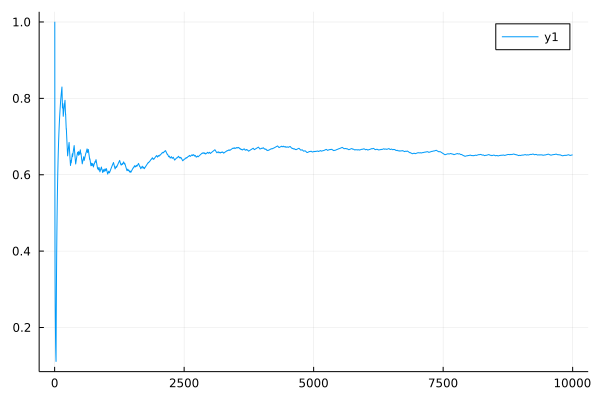

In [59]:
plot(proportions)

## Asset replacement (from Compecon)

At the beginning of each year, a manufacturer must decide whether to continue to operate an aging physical asset or replace it with a new one.

An asset that is $a$ years old yields a profit contribution $p(a)$ up to $n$ years, at which point, the asset becomes unsafe and must be replaced by law.

The cost of a new asset is $c$. What replacement policy maximizes profits?

Calibration: profit $p(a)=50-2.5a-2.5a^2$. Maximum asset age: 5 years. Asset replacement cost: 75, annual discount factor $\delta=0.9$.

__Define kind of problem, the state space, the actions, the reward function, and the Bellman updating equation__

__Solve the problem using Value Function Iteration__

__Solve the problem using Policy Iteration. Compare with VFI.__

### Job-Search Model

- When unemployed in date, a job-seeker
  - consumes unemployment benefit $c_t = \underline{c}$
  - receives in every date $t$ a job offer $w_t$
    - $w_t$ is i.i.d., 
    - takes values $w_1, w_2, w_3$ with probabilities $p_1, p_2, p_3$
  - if job-seeker accepts, becomes employed at rate $w_t$ in the next period
  - else he stays unemployed
  
- When employed at rate $w$
  - worker consumes salary $c_t = w$
  - with small probability $\lambda>0$ looses his job:
    - starts next period unemployed
  - otherwise stays employed at same rate
- Objective: $\max E_0 \left\{ \sum \beta^t \log(w_t) \right\}$


__What are the states, the controls, the reward of this problem ? Write down the Bellman equation.__

__Define a parameter structure for the model.__

__Define a function  `value_update(V_U::Vector{Float64}, V_E::Vector{Float64}, x::Vector{Bool}, p::Parameters)::Tuple{Vector, Vector}`, which takes in value functions tomorrow and a policy vector and return updated values for today.__

__Define a function `policy_eval(x::Vector{Bool}, p::Parameter)::Tuple{Vector, Vector}` which takes in a policy vector and returns the value(s) of following this policies forever. You can add relevant arguments to the function.__ which takes in a policy vector and returns the value(s) of following this policies forever. You can add relevant arguments to the function.__

__Define a function `bellman_step(V_E::Vector, V_U::Vector, p::Parameters)::Tuple{Vector, Vector, Vector}` which returns updated values, together with improved policy rules.__

__Implement Value Function__

__Implement Policy Iteration and compare rates of convergence.__

__Discuss the Effects of the Parameters__